In [1]:
pip install googletrans


  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=03397babd0b6cd53bc053c13666f07b2b8e10728932dab5f07de11be6f1e9a4e
  Stored in directory: c:\users\swayamprabha\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


In [23]:
import sys
sys.path.insert(1,'./lib/python3.8/site-packages')
import pandas as pd
import googletrans
import matplotlib.pyplot as plt; plt.rcdefaults() 
from matplotlib import *
from numpy import *

In [24]:
data = pd.read_csv("C:\\Users\\SWAYAMPRABHA\\Documents\\amazon.csv",thousands='.')

In [25]:
data.shape

(6454, 5)

In [26]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [27]:
data.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2003-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [28]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [29]:
data = data.replace(0,nan)
data2 = data.dropna(subset=['number'])
print(data2)

      year      state     month  number        date
5     2003       Acre   Janeiro    10.0  2003-01-01
7     2005       Acre   Janeiro    12.0  2005-01-01
8     2006       Acre   Janeiro     4.0  2006-01-01
12    2010       Acre   Janeiro     1.0  2010-01-01
17    2015       Acre   Janeiro     1.0  2015-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[5837 rows x 5 columns]


In [30]:
data2.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [31]:
forest_fire_per_month = data2.groupby('month')['number'].sum()
print(forest_fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Mar�o          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [32]:
months_unique = list(data2.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique,axis=0)
print(forest_fire_per_month)

month
Janeiro        52587.0
Fevereiro      30952.0
Mar�o          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64


In [33]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [34]:
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Mar�o,35118.0
Abril,28364.0
Maio,46083.0


In [35]:
forest_fire_per_month.reset_index(level=0,inplace=True)
forest_fire_per_month.head()


,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Mar�o,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [36]:
from googletrans import Translator
translator = Translator()

for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print(".....")
    

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
.....
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
.....
Detected(lang=en, confidence=0.0)
Translated(src=en, dest=en, text=Mar�o, pronunciation=Mar�o, extra_data="{'translat...")
.....
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
.....
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
.....
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
.....
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
.....
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August,

In [37]:
translator2 = Translator()

for i,m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i,'month'] = month1
    

In [41]:
print(forest_fire_per_month)
forest_fire_per_month['month'].replace({'Janeiro':'January','Mar�o':'March'},inplace=True)

        month     number
0     Janeiro    52587.0
1    February    30952.0
2       Mar�o    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

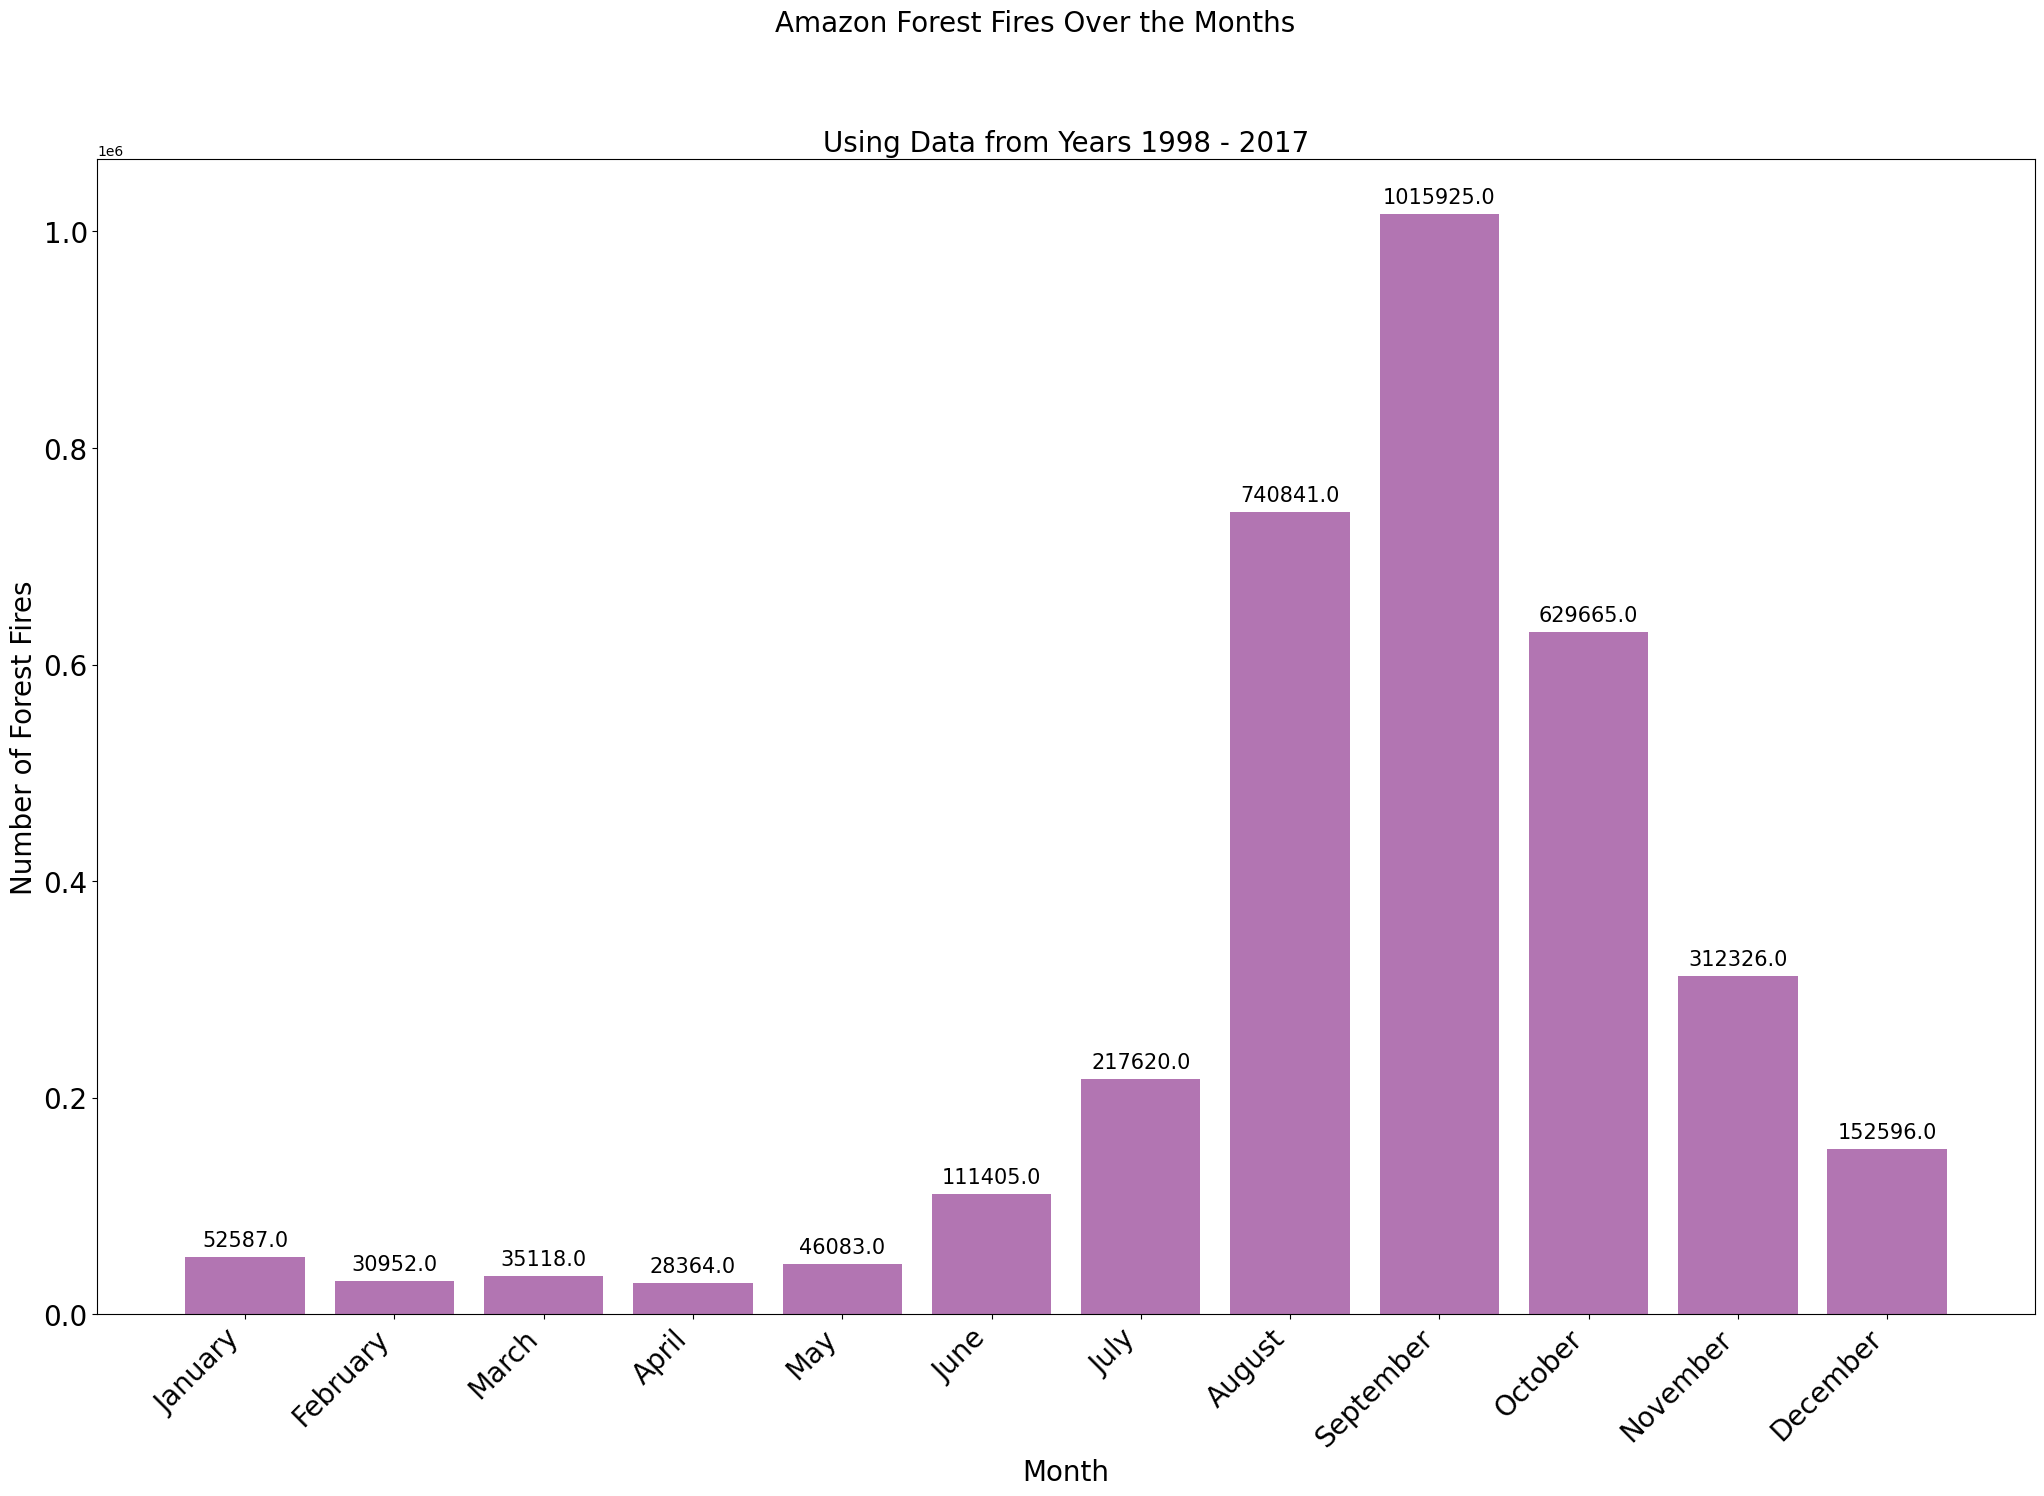

In [42]:
plt.figure(figsize=(25, 15)) #specify width and height 


plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 


plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20) 
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)


for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)